## BF550: Project 2
### A Replication of Thompson et al., 2024: Effect of High Glucose on Embryological Development of Zebrafish, *Brachyodanio, Rerio* through Wnt Pathway

Gene count dataset downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE228661

Data and figures from Effects of High Glucose on Embryological Development of Zebrafish, *Brachyodania, Rerio* through Wnt Pathway (https://doi.org/10.3390/ijms25179443)

#### Installing and loading packages

In [50]:
!pip install pydeseq2
!pip install sanbomics

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.2 MB/s eta 0:00:00


In [1]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Loading data

In [2]:
# load in counts data frame
counts = pd.read_csv('GSE228661_gene_count.txt', sep='\t')
# filter count data to only include gene IDS, control samples, and glucose samples
data = ['gene_id', 'C1m', 'G1m', 'C2f', 'G2f', 'C2m', 'G2m']
counts = counts[data]
# set gene id to row names
counts = counts.set_index('gene_id')
# filter out genes iwth all 0 counts
counts = counts[counts.sum(axis = 1) > 0]
# transpose counts df so that samples are rows and genes are cols
counts = counts.T
counts

gene_id,ENSDARG00000017624,ENSDARG00000063905,ENSDARG00000020850,ENSDARG00000063908,ENSDARG00000027088,ENSDARG00000020574,ENSDARG00000022767,ENSDARG00000063911,ENSDARG00000063912,ENSDARG00000029150,...,ENSDARG00000100903,ENSDARG00000098283,ENSDARG00000103206,ENSDARG00000099857,ENSDARG00000098993,ENSDARG00000101621,ENSDARG00000101486,ENSDARG00000105076,ENSDARG00000100009,ENSDARG00000098807
C1m,259093,161445,92927,178115,186328,40133,46345,54254,65907,41100,...,0,0,0,0,0,0,0,0,0,1
G1m,303003,209165,156398,95227,39895,92577,85032,54606,67081,78854,...,0,0,0,0,0,0,0,0,0,0
C2f,291033,237848,123415,120595,122149,102962,99857,91899,77963,62060,...,1,1,0,1,0,0,1,0,1,0
G2f,290620,216585,104665,105443,57650,58564,80408,85445,69384,62870,...,0,0,0,0,0,0,0,0,0,0
C2m,342501,265665,111068,159991,113159,76543,83444,82840,85828,49254,...,0,0,1,0,0,1,0,1,0,0
G2m,282841,170363,122454,119200,45072,118743,74756,49402,66862,65939,...,0,0,0,0,1,0,0,0,0,0


In [3]:
# create metadata from sample names and treatment groups
data = np.array([
    ['C1m','control'],
    ['G1m','glucose'],
    ['C2f','control'],
    ['G2f','glucose'],
    ['C2m','control'],
    ['G2m','glucose']
])
columns = ['sample', 'treatment']
metadata = pd.DataFrame(data, columns=columns)
# set treatment to be a categorical variable
metadata['treatment'] = pd.Categorical(metadata['treatment'])
# set sample to row names
metadata = metadata.set_index('sample')
metadata

,treatment
sample,
C1m,control
G1m,glucose
C2f,control
G2f,glucose
C2m,control
G2m,glucose


#### Differential expression analysis

In [4]:
# create dds object
dds = DeseqDataSet(counts = counts,
                   metadata = metadata,
                   design_factors = 'treatment')
# run deseq2 on dds object
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 2.16 seconds.

Fitting dispersion trend curve...
... done in 0.79 seconds.

Fitting MAP dispersions...
... done in 2.41 seconds.

Fitting LFCs...
... done in 2.12 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.



In [5]:
stat_res = DeseqStats(dds, contrast = ('treatment','glucose','control'))
stat_res.summary()
# saving results data frame from deseq
res = stat_res.results_df

Running Wald tests...


Log2 fold change & Wald test p-value: treatment glucose vs control
                         baseMean  log2FoldChange     lfcSE      stat  \
gene_id                                                                 
ENSDARG00000017624  292457.755873       -0.027292  0.164826 -0.165580   
ENSDARG00000063905  208020.940502       -0.154180  0.221075 -0.697413   
ENSDARG00000020850  117329.107756        0.217150  0.206482  1.051663   
ENSDARG00000063908  129506.802409       -0.526223  0.235477 -2.234709   
ENSDARG00000027088   94478.441662       -1.579214  0.287566 -5.491667   
...                           ...             ...       ...       ...   
ENSDARG00000101621       0.156876       -0.968422  4.425573 -0.218824   
ENSDARG00000101486       0.166144       -0.968422  4.425573 -0.218824   
ENSDARG00000105076       0.156876       -0.968422  4.425573 -0.218824   
ENSDARG00000100009       0.166144       -0.968422  4.425573 -0.218824   
ENSDARG00000098807       0.175722       -0.968422  4.4255

... done in 1.91 seconds.



#### Figure 2B: Volcano plot

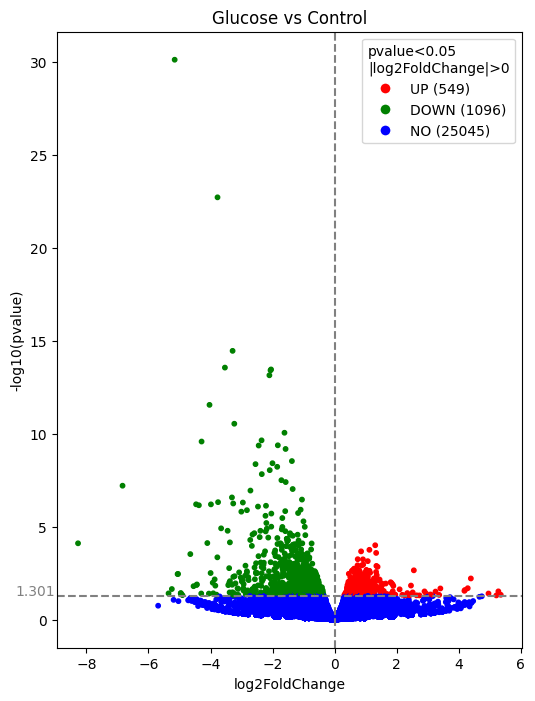

In [6]:
# create new column with -log(pvalue)
res['-log(pvalue)'] = -np.log10(res['pvalue'])
# create column for significant expression
res['expression'] = res.apply(
    lambda row: 'UP' if (row['pvalue'] < 0.05 and row['log2FoldChange'] > 0)
        else 'DOWN' if (row['pvalue'] < 0.05 and row['log2FoldChange'] < 0)
        else 'NO',
    axis = 1
)
# create color column based on expression
res['color'] = res.apply(
    lambda row: 'red' if (row['expression'] == 'UP')
        else 'green' if (row['expression'] == 'DOWN')
        else 'blue',
    axis = 1
)

# make scatterplot with matplotlib
plt.figure(figsize=(6,8))
plt.scatter(res['log2FoldChange'], res['-log(pvalue)'], c=res['color'], s=10)
# adding line to show thresholds
sig_y = -np.log10(0.05)
plt.axhline(y=sig_y, color='gray', linestyle='--')
plt.text(x=-10.3, y=sig_y, s=1.301, color='gray')
plt.axvline(x=0, color='gray', linestyle='--')
# adding title and axis labels
plt.title('Glucose vs Control')
plt.xlabel('log2FoldChange')
plt.ylabel('-log10(pvalue)')

# adding legend
# counting points in each expression category
counts = res['expression'].value_counts()
# making legend labels with expression category and count
legend_labels = [
    f'UP ({counts.get("UP", 0)})',
    f'DOWN ({counts.get("DOWN", 0)})',
    f'NO ({counts.get("NO", 0)})'
]
# making legend handles for each label
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label=legend_labels[0]),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label=legend_labels[1]),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label=legend_labels[2])]
# plotting legend in upper right corner
plt.legend(handles=handles, loc='upper right', title='pvalue<0.05\n|log2FoldChange|>0')

# showing volcano plot
plt.show()

#### Figure 2D: Heatmap

In [7]:
# transforming normalized counts -> natural log of 1+normed count
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])
# finding significant genes
# paper uses pvalue less than 0.05 and |log2FC| greater than 0
sigs = res[(res.pvalue < 0.05) & (abs(res.log2FoldChange) > 0)]
# subset sigs from dds to access normalized counts
dds_sigs = dds[:, sigs.index]

[Text(0.5, 0, 'C1m'),
 Text(1.5, 0, 'C2f'),
 Text(2.5, 0, 'C2m'),
 Text(3.5, 0, 'G1m'),
 Text(4.5, 0, 'G2f'),
 Text(5.5, 0, 'G2m')]

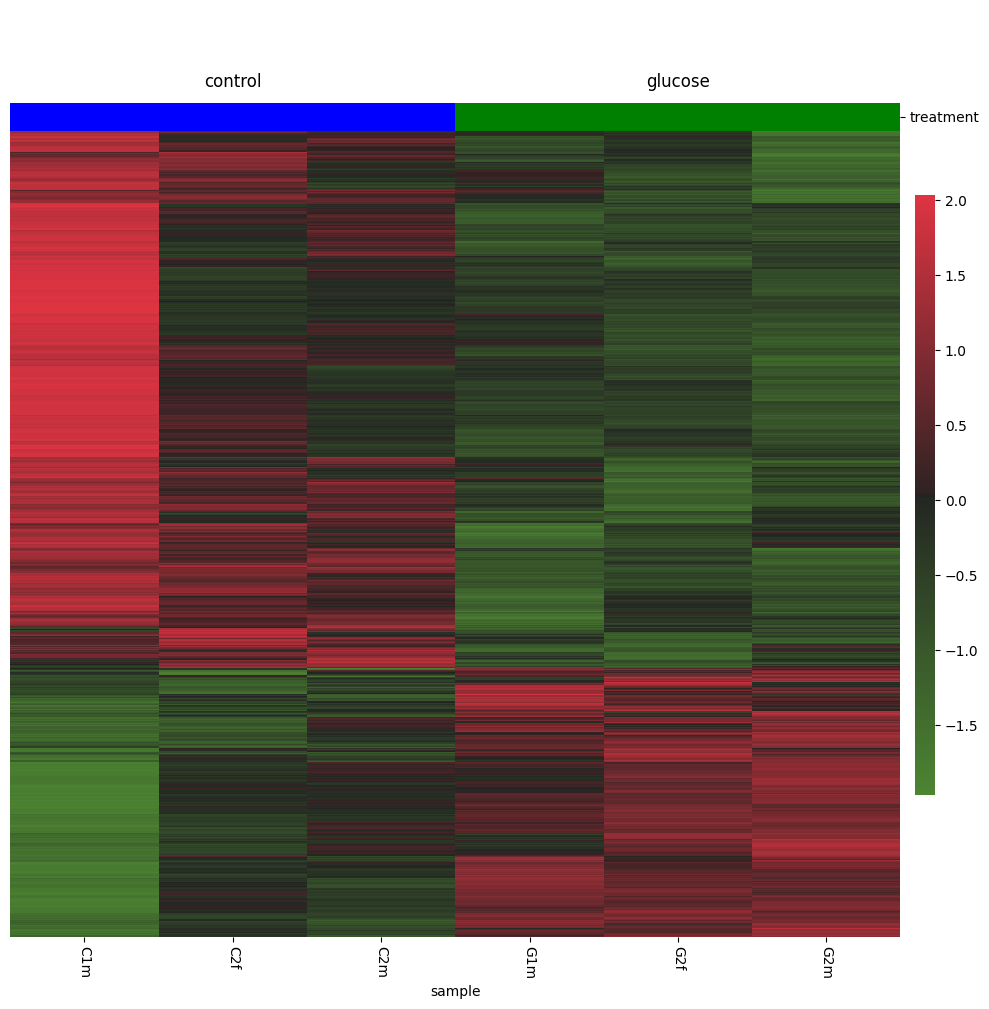

In [8]:
# sorting samples in metadata
sorted_samples = metadata.sort_values(by='treatment').index
# reorder columns to match metadata
dds_sigs = dds_sigs[sorted_samples]
# adding colors for control and glucose cluster bar
treatment_colors = {'control':'blue','glucose':'green'}
col_colors = metadata['treatment'].map(treatment_colors)

# creating grapher object for heatmap
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)
# graphing heat map
clustermap = sns.clustermap(grapher, z_score=0, cmap = sns.diverging_palette(120, 10, s=80, l=50, center="dark", as_cmap=True),
                            col_colors=col_colors, col_cluster=False, yticklabels=False,
                            row_cluster=True, dendrogram_ratio=(0, 0.1))

# heatmap formatting
# remove y tick labels and y-axis label
clustermap.ax_heatmap.set_ylabel('')
# add treatment labels to column group bars
group_labels = metadata.loc[sorted_samples, 'treatment'].unique()
group_positions = [list(metadata['treatment']).count(group) for group in group_labels]
ax = clustermap.ax_heatmap
x_positions = [sum(group_positions[:i]) + group_positions[i] / 2 for i in range(len(group_positions))]
for x, label in zip(x_positions, group_labels):
    ax.text(x, -100, label, ha='center', va='center', fontsize=12, color='black', transform=ax.transData)
# move color bar to be to the right of the plor
clustermap.cax.set_position([0.92, 0.2, 0.02, 0.6])
# rotate x-axis tick labels by 270 degrees
clustermap.ax_heatmap.set_xticklabels(labels=clustermap.ax_heatmap.get_xticklabels(), rotation=270)